<a href="https://colab.research.google.com/github/ManelBoucenna/AI-s-code-repository/blob/master/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project, we will try to explain what are the factors that impact pupils' grades. 

This dataset is presents student achievement in secondary education of two Portuguese schools. The dataset is available [here](https://archive.ics.uci.edu/ml/datasets/student+performance).


Some question we might ask ourselves:


1.   Does a pupil from an educated family have better chances to succeed at school ?
2.   Do girls have better grades than boys?
3.   Can we predict students' grades based on those factors? If yes, what are the relevant factors to consider?

This project will be divided into 3 section:
1. Data exploration and visualization
2. Pre-processing pipeline creation
3. Model training and validation





# Data exploration and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
URL_MAT = 'https://raw.githubusercontent.com/ManelBoucenna/AI-s-code-repository/master/Challenges/Students_performance/data/student-mat.csv'
URL_POR = 'https://raw.githubusercontent.com/ManelBoucenna/AI-s-code-repository/master/Challenges/Students_performance/data/student-por.csv'

mat_grades = pd.read_csv(URL_MAT)
por_grades = pd.read_csv(URL_POR)

por_grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
por_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
por_grades.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
cat_cols = por_grades.select_dtypes(include='object').columns.tolist()
ord_cols = ['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc', 'Walc','health']
num_cols = por_grades.select_dtypes(include=np.number).columns.tolist()
num_cols = [ele for ele in num_cols if ele not in ord_cols] 
target_cols = ['G3']

demo_cols = ['sex','age', 'address', 'internet']
fam_cols = ['famsize','Pstatus','Medu','Fedu','Mjob','Fjob', 'guardian', 'famsup', 'famrel']
social_cols = ['romantic', 'freetime', 'goout']
health_cols = ['nursery', 'health']
alcohol_cols = ['Dalc', 'Walc']
school_cols = ['school', 'reason', 'traveltime', 'studytime','failures','schoolsup', 'paid', 'activities', 'higher', 'absences']
grades_cols = ['G1', 'G2', 'G3']

print('Categorical columns: ', cat_cols)
print('Numerical columns: ', num_cols)
print('Ordinal columns: ', ord_cols)
print('Target: ', target_cols)

Categorical columns:  ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical columns:  ['age', 'failures', 'absences', 'G1', 'G2', 'G3']
Ordinal columns:  ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
Target:  ['G3']


We will visualize the distribution of numerical data

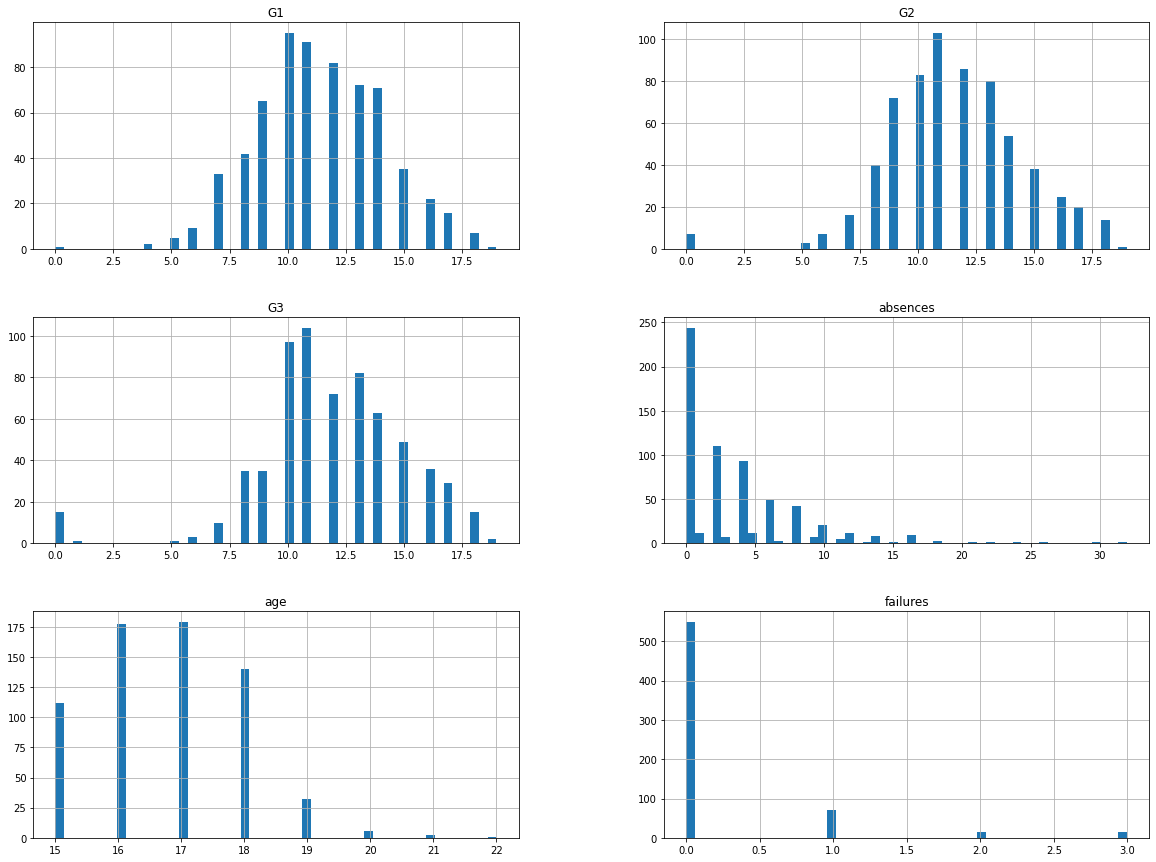

In [6]:
por_grades[num_cols].hist(bins=50, figsize=(20,15))
plt.show()


**Observations:**

*   Age between 15-22 years old



We will visualize the distribution of categorical and ordinal data:

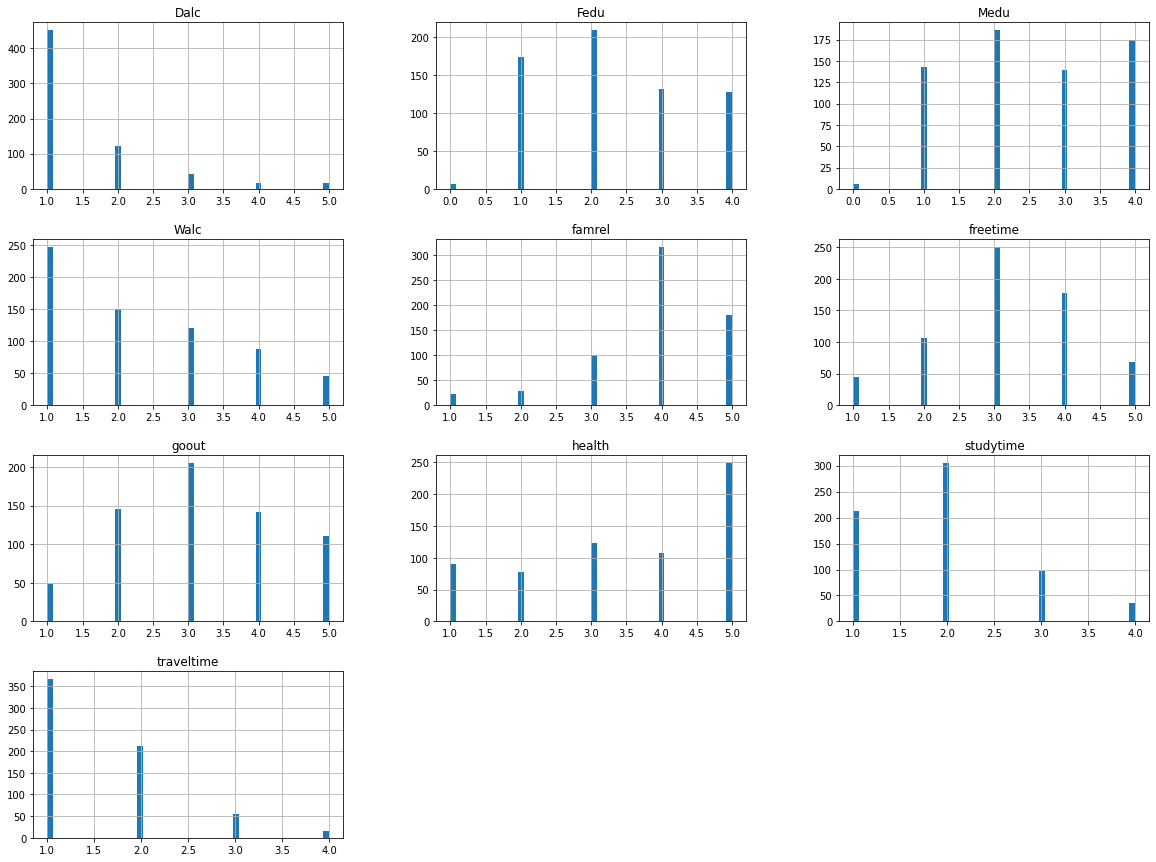

In [7]:
por_grades[ord_cols].hist(bins=50, figsize=(20,15))
plt.show()


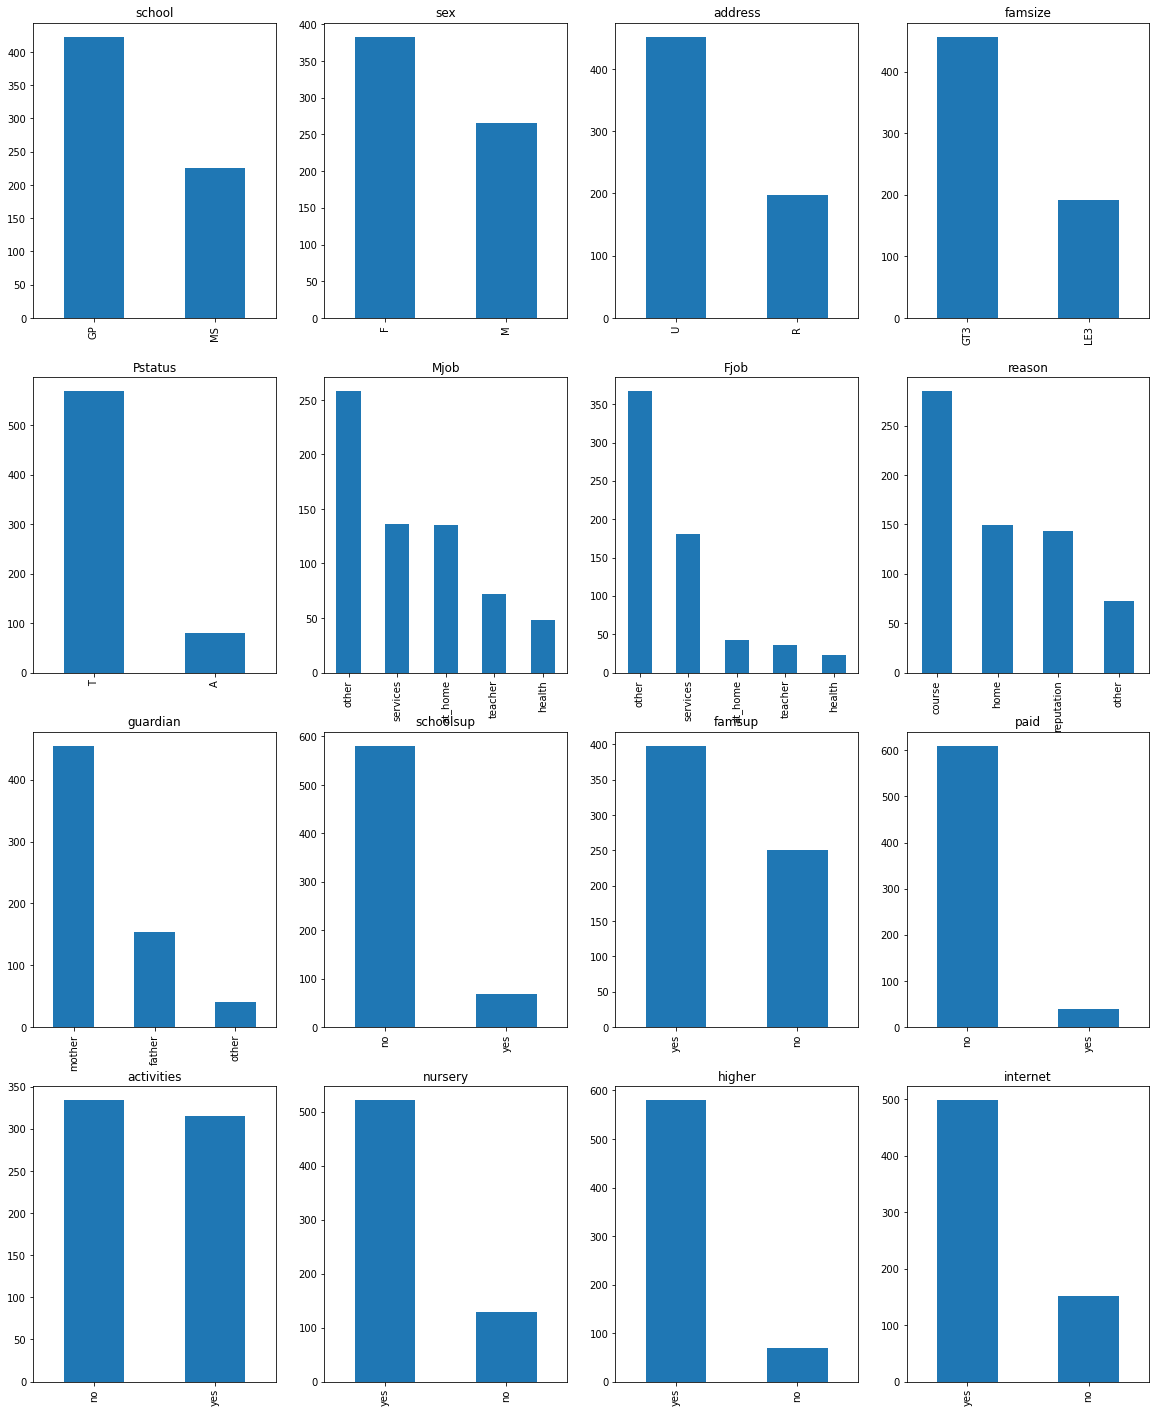

In [8]:
figure, axes = plt.subplots(4, 4, figsize=(20,25))
idx = 0
for i in range(0, 4):
  for j in range(0,4):
    category = cat_cols[idx]
    por_grades[category].value_counts().plot(kind='bar', title = category ,ax = axes[i][j]);
    idx +=1


Question: Is there a relationship between family and grades?

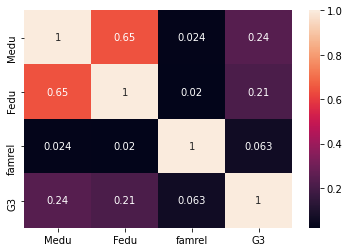

In [9]:
attributes = fam_cols+ target_cols
corr_matrix = por_grades[attributes].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


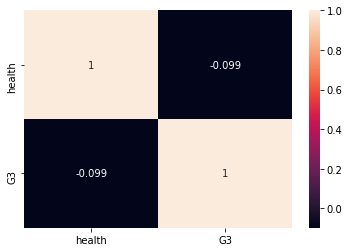

In [10]:
attributes = health_cols+ target_cols
corr_matrix = por_grades[attributes].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


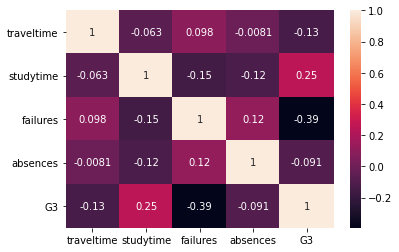

In [11]:
attributes = school_cols+ target_cols
corr_matrix = por_grades[attributes].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


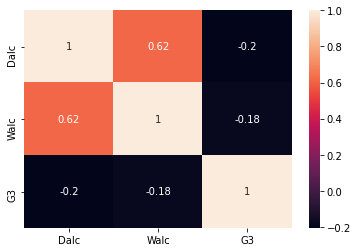

In [12]:
attributes = alcohol_cols+ target_cols
corr_matrix = por_grades[attributes].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

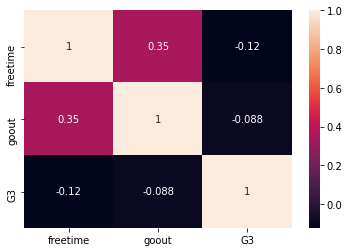

In [13]:
attributes = social_cols+ target_cols
corr_matrix = por_grades[attributes].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

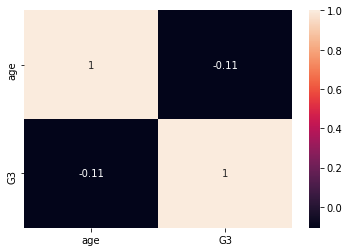

In [14]:
attributes = demo_cols+ target_cols
corr_matrix = por_grades[attributes].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Observation:**

* Poor relationtip between G3 and famrel variable
* Poor relationship between grades and health
* Poor relationship between grades and absences
* Poor relationship between going out and grades

In [15]:
corr_matrix = por_grades.corr()
corr_matrix["G3"].sort_values(ascending=False)


G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64

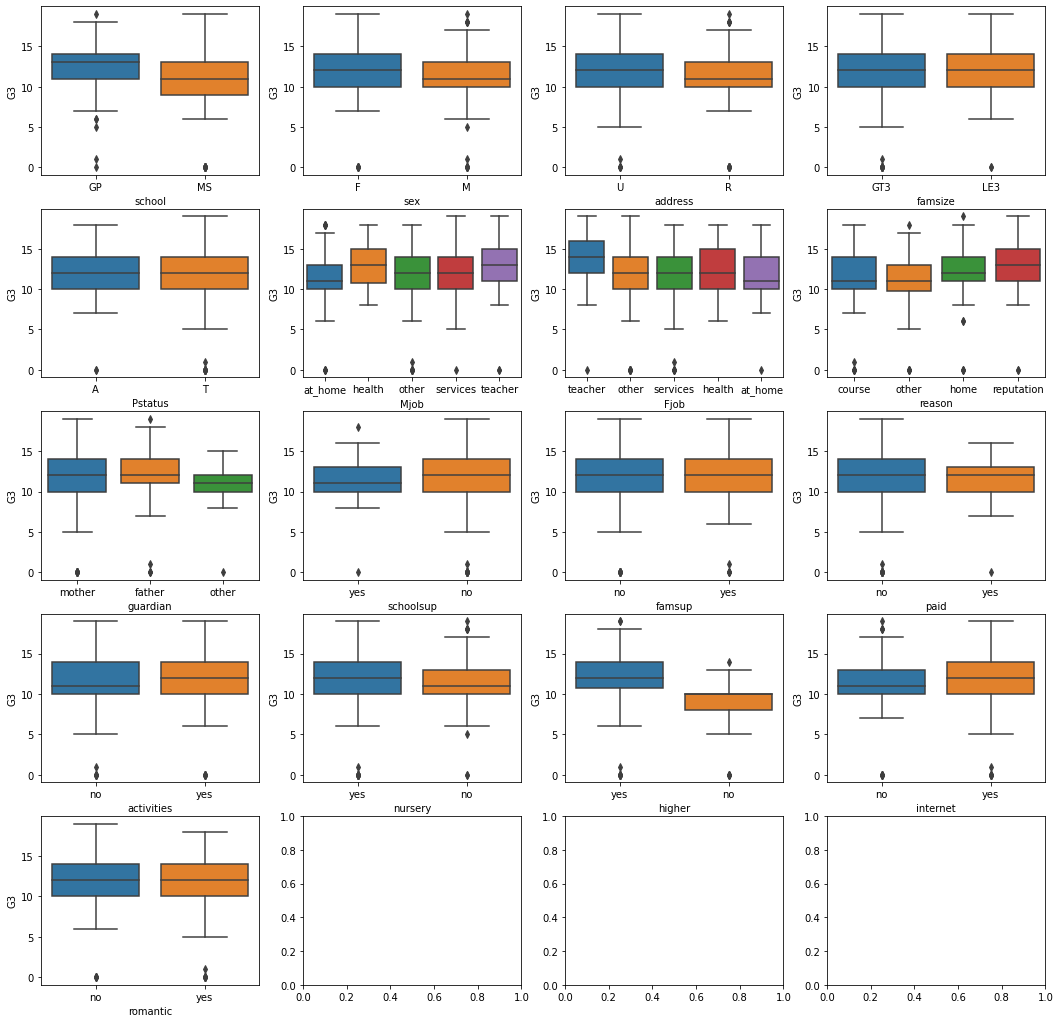

In [16]:
fig, axes = plt.subplots(5, 4, figsize=(18, 18))

idx = 0
for i in range(5):
  for j in range(4):
    if (idx < 17):
      sns.boxplot(ax=axes[i, j], data=por_grades, x=cat_cols[idx], y='G3')
      idx+=1

**Observations:**

* Students who want to go to college have better grades.
* Students with jobless parents seems to have poor grades.
* Famsize doesn't seem to impact grades.
* Romantic doesn't seem to impact grades.
* Activities doesn't seem to impact grades.
* famsup doesn't seem to impact grades
* Pstatut doesnt seem to impact grades


**Conclusion and next steps**

* There is no missing data
* Delete irrelevant variables: 
```
del_col = ['famsize','romatic', 'activities','famsup','pstatut','famrel','health','absences','goout']
```
* Apply one hot encoding on variables: 
```
OH_col = ['Mjob','Fjob','reason','guardian']
```
* Apply Binary encoding on variables: 
```
binary_col = ['school','sex','address','schoolsup','paid','internet','nursery','higher']
```
* Apply Scaling on variables: 

```
scale_cols = ['age', 'failures', 'G1', 'G2', 'G3','traveltime', 'studytime',  'freetime', 'Dalc', 'Walc']
```


* Create pipelines


# Pipeline preprocessing

In [32]:
del_col = ['famsize','romantic', 'activities','famsup','Pstatus','famrel','health','absences','goout']
OH_col = ['Mjob','Fjob','reason','guardian']
bin_col = ['school','sex','address','schoolsup','paid','internet','nursery','higher']
scale_col = ['age', 'failures', 'G1', 'G2', 'G3','traveltime', 'studytime',  'freetime', 'Dalc', 'Walc']

In [33]:
por_grades_with_rel = por_grades.drop(columns=del_col)

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import FeatureUnion


scale_transformer = Pipeline(steps=[
    ('selector', DataFrameSelector(scale_col)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

OH_transformer = Pipeline(steps=[
    ('selector', DataFrameSelector(OH_col)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

binary_transformer = Pipeline(steps=[
    ('selector', DataFrameSelector(bin_col)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('binarizer', LabelEncoder())
    ])

preprocessor = FeatureUnion(transformer_list=[
        ('num', scale_transformer),
        ('bin',binary_transformer),
        ('cat', OH_transformer)
        ])


In [83]:
processed_grades = preprocessor.fit_transform(por_grades_with_rel)
processed_grades

TypeError: ignored